## PCA

Let's build a simple 3D dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

In [2]:
m = 60
w1, w2 = 0.1, 0.3
noise = .1

angles = np.random.rand(m) * 3 * np.pi/2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

## Principal Components

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[:, 0]
c2 = Vt[:, 1]

In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

## Projecting down to 2D

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

## Using Scikit-learn

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [10]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [11]:
np.allclose(X2D, -X2D_using_svd)

True

Recovering the 3D set from X2D

In [12]:
X3D_inv = pca.inverse_transform(X2D)

In [13]:
np.allclose(X3D_inv, X)

False

Some info was lost in conversion to 2D. Let's calculate the inversion error

In [14]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

In [15]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [16]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

## Explained Variance Ratio

The ratio indicates the proportion of the dataset’s variance that
lies along each principal component

In [17]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

The first component explains 84.2% of the variance and the second explains 14.6%



By projecting from 3D to 2D, we lost 1.1% of the variance

In [18]:
1 - np.sum(pca.explained_variance_ratio_)

0.011195535570688975

### plot the 2D data

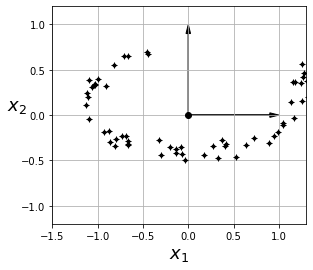

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], 'k+')
ax.plot(X2D[:, 0], X2D[:, 1], 'k.')
ax.plot([0], [0], 'ko')
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

**The Swiss role dataset**

In [20]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

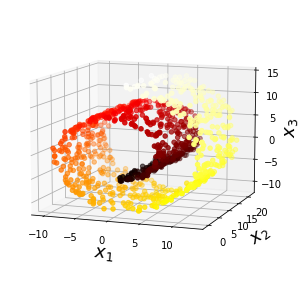

In [21]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:])
plt.show()

**Plotting squashed dataset on a plane and the unrolled dataset**

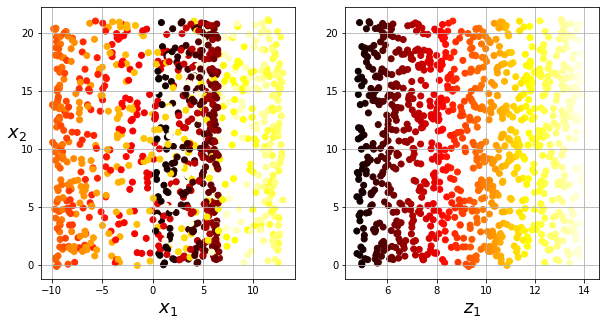

In [22]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(121)
ax.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18, rotation=0)
ax.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

## Choosing the right number of dimensions

In [23]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.target = mnist.target.astype(np.uint8)

In [24]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [25]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [26]:
d = np.argmax(cumsum >= 0.95) + 1  # index of first 'True' + 1
d

154

**Explained variance ratio as a function of dimensions**

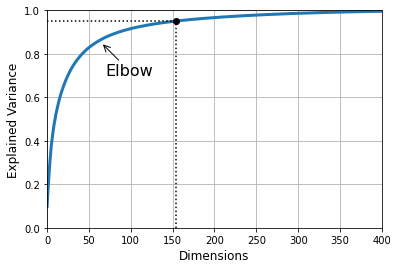

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions", fontsize=12)
plt.ylabel("Explained Variance", fontsize=12)
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot([d], [0.95], "ko")

plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7), fontsize=16, arrowprops={'arrowstyle':'->'})

plt.grid(True)
plt.show()

In [28]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [29]:
pca.n_components_

154

In [30]:
np.sum(pca.explained_variance_ratio_)

0.9504127888294237

## PCA for compression

In [31]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [32]:
def plot_digits(instances, images_per_row=5, **options):
    # my image plotter
    images_per_row = min(len(instances), images_per_row)
    nrows = (len(instances) // images_per_row) + (len(instances) % images_per_row != 0)
    inner_shape = list(instances[0].shape)
    pads = np.zeros([(nrows * images_per_row) - len(instances)] + inner_shape)
    padded = np.concatenate([instances, pads], axis=0)
    padded = padded.reshape(-1, 28, 28)
    out = np.empty((nrows*28, images_per_row*28))
    for i in range(0, padded.shape[0], images_per_row):
        rw = i // images_per_row
        repl = np.concatenate(padded[i:i+images_per_row], axis=1)
        out[rw*28:(rw+1)*28] = repl
    plt.imshow(out, cmap=plt.cm.binary)

# X_train = X_train.values


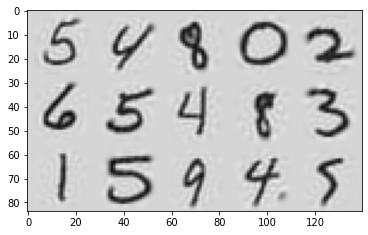

In [33]:
plot_digits(X_recovered[:15])
plt.show()

In [34]:
X_reduced_pca = X_reduced

## Randomized PCA
Searches fast and randomly

In [35]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## Incremental PCA
For PCA in minibatches, when dataset cannot fit in memory

In [36]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
ipca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    ipca.partial_fit(X_batch)

X_reduced = ipca.transform(X_train)

....................................................................................................

In [37]:
X_recovered_ipca = ipca.inverse_transform(X_reduced)

In [38]:
try:
    X_train = X_train.values
except ValueError as ver:
    pass

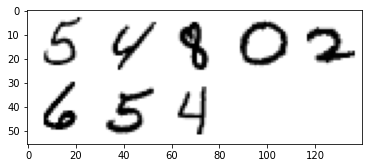

In [39]:
plot_digits(X_train[:8])

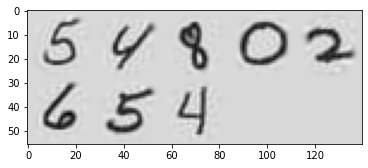

In [40]:
plot_digits(X_recovered_ipca[:8])

**Using `memmap()`**

Create the `memmap` in a seperate program

In [41]:
filename = '_my_mnist.mmp'
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

Now deleting the `memmap` will trigger its Python finalizer, ensuring that it is written in the file

In [42]:
del X_mm

Another program can now load and use the file contents

In [43]:
X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m, n))

batch_size = m // n_batches
ipca = IncrementalPCA(n_components=154, batch_size=batch_size)
ipca.fit(X_mm)

IncrementalPCA(batch_size=560, n_components=154)